In [28]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [74]:
data = pd.read_csv("../data/xdr_data.csv")

In [75]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [77]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [78]:
# Check for missing data
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [79]:
data['Avg RTT DL (ms)'].skew()

62.90782807995961

In [80]:
from scipy.stats import shapiro

In [81]:
stat, p = shapiro(data['Avg RTT DL (ms)'].dropna())
if p > 0.05:
    print("Avg RTT DL (ms) is normally distributed", p)
else:
    print("Avg RTT DL (ms) is not normally distributed", p)

Avg RTT DL (ms) is not normally distributed 2.1189776770041153e-187


/opt/miniconda3/envs/10-a/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 122172.
  res = hypotest_fun_out(*samples, **kwds)


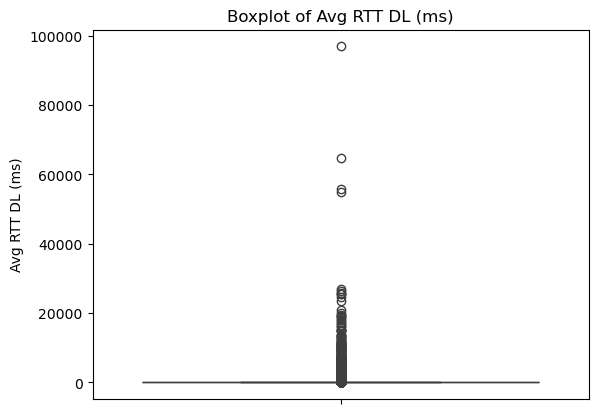

In [82]:
sns.boxplot(data['Avg RTT DL (ms)'])
plt.title('Boxplot of Avg RTT DL (ms)')
plt.show()

In [83]:
stat, p = shapiro(data['Avg RTT UL (ms)'].dropna())
if p > 0.05:
    print("Avg RTT UL (ms) is normally distributed", p)
else:
    print("Avg RTT UL (ms) is not normally distributed", p)

Avg RTT UL (ms) is not normally distributed 1.2407118431892299e-185


/opt/miniconda3/envs/10-a/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 122189.
  res = hypotest_fun_out(*samples, **kwds)


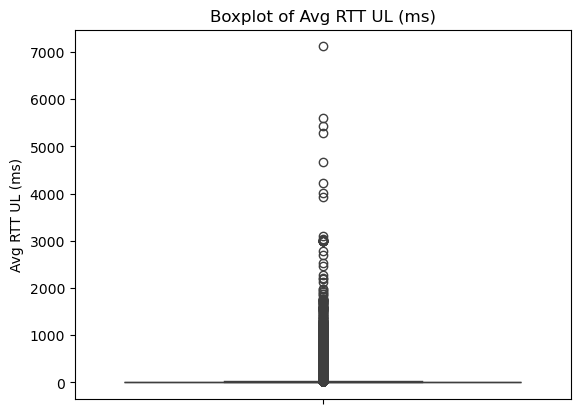

In [84]:
sns.boxplot(data['Avg RTT UL (ms)'])
plt.title('Boxplot of Avg RTT UL (ms)')
plt.show()

In [85]:
# Data Treatment
# Use mean for normally distributed data, and use median for skewed data (not normally distributed)
data['Avg RTT UL (ms)'] = data['Avg RTT UL (ms)'].fillna(data['Avg RTT UL (ms)'].median())
data['Avg RTT DL (ms)'] = data['Avg RTT DL (ms)'].fillna(data['Avg RTT DL (ms)'].median())

In [86]:
data[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].isnull().sum()

Avg RTT DL (ms)    0
Avg RTT UL (ms)    0
dtype: int64

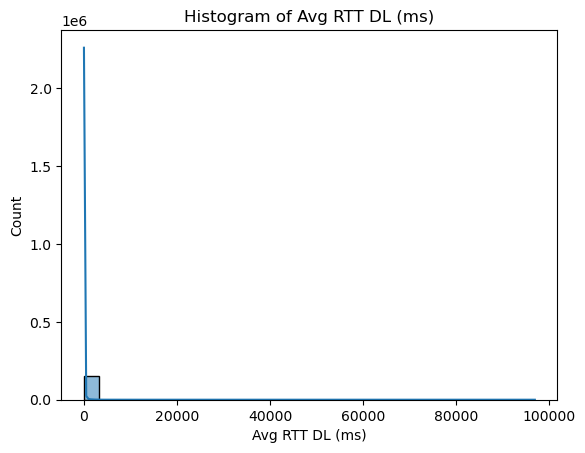

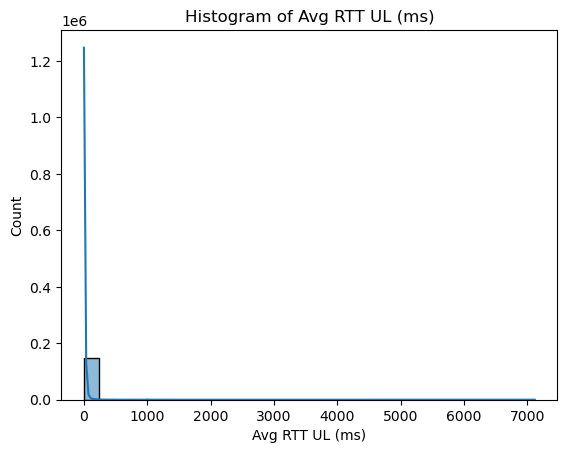

In [87]:
# Plot Avg RTT DL (ms)
sns.histplot(data['Avg RTT DL (ms)'], kde=True, bins=30)
plt.title('Histogram of Avg RTT DL (ms)')
plt.show()

# Plot Avg RTT UL (ms)
sns.histplot(data['Avg RTT UL (ms)'], kde=True, bins=30)
plt.title('Histogram of Avg RTT UL (ms)')
plt.show()

In [88]:
data['Handset Manufacturer'].isnull().sum()

data['Handset Manufacturer'] = data['Handset Manufacturer'].fillna(data['Handset Manufacturer'].mode()[0])

data['Handset Manufacturer'].isnull().sum()


0

In [89]:
data = data.dropna(subset=['MSISDN/Number'])
data.drop(['Nb of sec with 37500B < Vol UL'], axis=1, inplace=True)

In [90]:
data['Total UL (Bytes)'] = data['HTTP UL (Bytes)'].fillna(0) + data['Youtube UL (Bytes)'].fillna(0)

In [91]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.485060e+05,148935.000000,148935.000000,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,148935.000000,148935.000000,...,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05
mean,1.014676e+19,499.246732,498.675442,1.048702e+05,2.082016e+14,4.188282e+10,4.849493e+13,96.489522,15.293235,13286.171390,...,1.163345e+07,1.100867e+07,1.162756e+07,1.100017e+07,4.220256e+08,8.289085e+06,4.211473e+08,8.263189e+06,1.248900e+07,4.546251e+08
std,2.893262e+18,288.555630,288.089136,8.106343e+04,1.522166e+10,2.447443e+12,2.242829e+13,536.879667,76.683630,23978.591234,...,6.711384e+06,6.345428e+06,6.724686e+06,6.358918e+06,2.439763e+08,4.782090e+06,2.431970e+08,4.768708e+06,1.475812e+07,2.441528e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,1.610000e+02,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.788350e+04,2.082014e+14,3.365130e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.831331e+06,5.516710e+06,5.779947e+06,5.474451e+06,2.104587e+08,4.130162e+06,2.102119e+08,4.145072e+06,6.116106e+06,2.430996e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572221e+13,45.000000,5.000000,63.000000,...,1.161638e+07,1.101329e+07,1.164269e+07,1.099563e+07,4.234208e+08,8.291222e+06,4.218716e+08,8.266089e+06,1.182235e+07,4.558708e+08
75%,1.304243e+19,749.000000,750.000000,1.327000e+05,2.082018e+14,3.368349e+10,8.611970e+13,62.000000,11.000000,19681.000000,...,1.744571e+07,1.651442e+07,1.747072e+07,1.650429e+07,6.331620e+08,1.243184e+07,6.316602e+08,1.238204e+07,1.742422e+07,6.656577e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,1.502149e+09,9.029696e+08


In [92]:
data.isnull().sum()

Bearer Id                                      429
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             589
Avg RTT DL (ms)                                  0
Avg RTT UL (ms)                                  0
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87796
TCP UL Retrans. Vol (Bytes)                  96192
DL TP < 50 Kbps (%)                            720
50 Kbps < DL TP < 250 Kbps (%)                 720
250 Kbps < DL TP < 1 Mbps (%)                  720
DL TP > 1 Mbps (%)             

In [102]:
data.drop([
    'Nb of sec with 125000B < Vol DL', 
    'Nb of sec with 1250B < Vol UL < 6250B', 
    'Nb of sec with 31250B < Vol DL < 125000B', 
    'Nb of sec with 6250B < Vol DL < 31250B', 
    'Nb of sec with 6250B < Vol UL < 37500B', 
    'Nb of sec with Vol DL < 6250B', 
    'Nb of sec with Vol UL < 1250B'
], axis=1, inplace=True)

In [103]:
data = data[data['Bearer Id'].notnull()]


In [104]:
data.isnull().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                       0
Avg RTT UL (ms)                       0
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
TCP DL Retrans. Vol (Bytes)       87764
TCP UL Retrans. Vol (Bytes)       96128
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
HTTP DL (Bytes)                   81129


In [106]:
data['Last Location Name'] = data['Last Location Name'].fillna('Unknown')

In [107]:
data['TCP DL Retrans. Vol (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'].fillna(0)
data['TCP UL Retrans. Vol (Bytes)'] = data['TCP UL Retrans. Vol (Bytes)'].fillna(0)

In [108]:
data['HTTP DL (Bytes)'] = data['HTTP DL (Bytes)'].fillna(0)
data['HTTP UL (Bytes)'] = data['HTTP UL (Bytes)'].fillna(0)

In [109]:
data.isnull().sum()

Bearer Id                           0
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (ms)                           0
IMSI                                0
MSISDN/Number                       0
IMEI                                0
Last Location Name                  0
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
TCP DL Retrans. Vol (Bytes)         0
TCP UL Retrans. Vol (Bytes)         0
DL TP < 50 Kbps (%)               712
50 Kbps < DL TP < 250 Kbps (%)    712
250 Kbps < DL TP < 1 Mbps (%)     712
DL TP > 1 Mbps (%)                712
UL TP < 10 Kbps (%)               767
10 Kbps < UL TP < 50 Kbps (%)     767
50 Kbps < UL TP < 300 Kbps (%)    767
UL TP > 300 Kbps (%)              767
HTTP DL (Bytes)                     0
HTTP UL (Bytes)                     0
Activity Dur